# **Poyecto 1, Mineria de datos** 

Grupo 7

Juan Sebastian Ruiz Caro 

Yibby Daniela Gonzalez Forero 
 
 **1. Descripción de la base:**
  
> La base seleccionada se tomó de UCI Machine Learning Repository, fue creada en 1987 tomando información de automóviles importados de 1985 del Anuario automotriz de Ward´s, manuales de automóviles de la oficina de servicios de seguros Water Street de New York y de informes de colisión del instituto de seguros para la seguridad en las carreteras en Washington DC.
Este data set contiene 204 observaciones y 26 atributos, de los cuales 15 son continuos, uno es discreto y 10 son cualitativos. Dichas variables presentan características que describen la composición de un automóvil, como lo es el tipo combustible que usa, la marca, longitud, ancho, precio, entre otros. 

**2.  Escenarios de solución en minería de datos**

> La aplicación de esta base es principalmente para la solución de un problema de aprendizaje supervisado, puesto que se busca estimar el precio de los automóviles basándose en las diferentes características que componen cada observación, esto se realizó por medio de una regresión lineal en comparación de un algoritmo del vecino más cercano. Se seleccionó la base de automóviles por el interés de conocer el comportamiento de los vehículos y los términos familiarizados en la medición de las variables. 


# **3. Análisis exploratorio**

In [13]:
! pip install altair vega_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
!pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 29.7 MB/s 


In [147]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 24.2 MB/s 
     |████████████████████████████████| 9.8 MB 49.3 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=e4486c624973be0e0690982196b02661999b2360f0caf091ba144d7d6310ff52
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=7710612e94228c7358420931496296fec039fe80732990ab0e456c09f3eafef3
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from dfply import *
from sklearn.impute import KNNImputer
import pingouin as pg
from sklearn.linear_model import LinearRegression

In [15]:
!pip install -U -q PyDrive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df_Aut = pd.read_excel('/content/drive/MyDrive/Minería python/Base_Carros.xlsx', 
                 dtype={
                     'Simbolizacion': str
                 })
df_Aut.head()

,Simbolizacion,perdidas,marca,tipo de combustible,aspiracion,numero de puertas,estilo de carroceria,ruedas motrices,ubicacion del motor,distancia entre eje,...,tamaño del motor,sistema de combustible,diametro,carrera,relacion de compresion,caballos de fuerza,rmp pico,millas por galon,carretera,precio
0,3.0,NaN,alfa_romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa_romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa_romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Proceso de verificación de calidad de datos

Dimensión de los datos

In [56]:
print('Autos')
print('Filas: ', df_Aut.shape[0])
print('Columnas: ', df_Aut.shape[1])

Autos
Filas:  205
Columnas:  26


Tipo de datos

In [57]:
df_Aut.dtypes

Simbolizacion               object
perdidas                   float64
marca                       object
tipo de combustible         object
aspiracion                  object
numero de puertas           object
estilo de carroceria        object
ruedas motrices             object
ubicacion del motor         object
distancia entre eje        float64
longitud                   float64
ancho                      float64
altura                     float64
peso en orden de marcha    float64
tipo de motor               object
numero de cilindros         object
tamaño del motor           float64
sistema de combustible      object
diametro                   float64
carrera                    float64
relacion de compresion     float64
caballos de fuerza         float64
rmp pico                   float64
millas por galon           float64
carretera                  float64
precio                     float64
dtype: object

In [98]:
df_Aut.columns


Index(['Simbolizacion', 'perdidas', 'marca', 'tipo de combustible',
       'aspiracion', 'numero de puertas', 'estilo de carroceria',
       'ruedas motrices', 'ubicacion del motor', 'distancia entre eje',
       'longitud', 'ancho', 'altura', 'peso en orden de marcha',
       'tipo de motor', 'numero de cilindros', 'tamaño del motor',
       'sistema de combustible', 'diametro', 'carrera',
       'relacion de compresion', 'caballos de fuerza', 'rmp pico',
       'millas por galon', 'carretera', 'precio', 'imputed_perdidas',
       'imputed_diametro', 'imputed_carrera', 'imputed_caballosf',
       'imputed_rmp_pico', 'imputed_precio'],
      dtype='object')

In [60]:
df_cuali = df_Aut.loc[:,['Simbolizacion','marca', 'tipo de combustible',
       'aspiracion', 'numero de puertas', 'estilo de carroceria',
       'ruedas motrices', 'ubicacion del motor','tipo de motor', 'numero de cilindros','sistema de combustible']]
df_cuali.head()

,Simbolizacion,marca,tipo de combustible,aspiracion,numero de puertas,estilo de carroceria,ruedas motrices,ubicacion del motor,tipo de motor,numero de cilindros,sistema de combustible
0,3.0,alfa_romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,alfa_romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,alfa_romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Datos duplicados

In [61]:
df_Aut[df_Aut.duplicated()]

,Simbolizacion,perdidas,marca,tipo de combustible,aspiracion,numero de puertas,estilo de carroceria,ruedas motrices,ubicacion del motor,distancia entre eje,...,tamaño del motor,sistema de combustible,diametro,carrera,relacion de compresion,caballos de fuerza,rmp pico,millas por galon,carretera,precio


Datos faltantes

In [62]:
num_fal = df_Aut.isnull().sum()
Datos_faltantes = pd.DataFrame(num_fal, columns = ['Total_faltantes'])
Datos_faltantes['Proporción_faltantes %'] = round((Datos_faltantes['Total_faltantes']/df_Aut.shape[0])*100,2)
Datos_faltantes

,Total_faltantes,Proporción_faltantes %
Simbolizacion,0,0.00
perdidas,41,20.00
marca,0,0.00
tipo de combustible,0,0.00
aspiracion,0,0.00
numero de puertas,2,0.98
estilo de carroceria,0,0.00
ruedas motrices,0,0.00
ubicacion del motor,0,0.00
distancia entre eje,0,0.00


In [63]:
Faltan = (Datos_faltantes >>
  mask(X.Total_faltantes != 0))
Faltan

,Total_faltantes,Proporción_faltantes %
perdidas,41,20.00
numero de puertas,2,0.98
diametro,4,1.95
carrera,4,1.95
caballos de fuerza,2,0.98
rmp pico,2,0.98
precio,4,1.95


**Imputación cuantitativas**: perdidas, diametro, carrera, caballos de fuerza, rmp pico, precio. 

**Metodo**: vecino más cercano (KNN)

In [66]:
imputer = KNNImputer(n_neighbors=3, weights="distance")
df_Aut['imputed_perdidas'] = imputer.fit_transform(df_Aut[['perdidas']])
df_Aut['imputed_perdidas'].isnull().sum()

0

In [67]:
df_Aut['imputed_diametro'] = imputer.fit_transform(df_Aut[['diametro']])
df_Aut['imputed_diametro'].isnull().sum()

0

In [68]:
df_Aut['imputed_carrera'] = imputer.fit_transform(df_Aut[['carrera']])
df_Aut['imputed_carrera'].isnull().sum()

0

In [69]:
df_Aut['imputed_caballosf'] = imputer.fit_transform(df_Aut[['caballos de fuerza']])
df_Aut['imputed_caballosf'].isnull().sum()

0

In [70]:
df_Aut['imputed_rmp_pico'] = imputer.fit_transform(df_Aut[['rmp pico']])
df_Aut['imputed_rmp_pico'].isnull().sum() 

0

In [71]:
df_Aut['imputed_precio'] = imputer.fit_transform(df_Aut[['precio']])
df_Aut['imputed_precio'].isnull().sum() 

0

**Imputación cualitativas**: numero de puertas

In [73]:
print(pd.value_counts(df_Aut['numero de puertas'])) 
df_Aut[df_Aut['numero de puertas'].isnull()]
df_Aut['numero de puertas'] = df_Aut['numero de puertas'].fillna('four')
print(pd.value_counts(df_Aut['numero de puertas'])) 

four    114
two      89
Name: numero de puertas, dtype: int64
four    116
two      89
Name: numero de puertas, dtype: int64


In [75]:
from itertools import combinations
from  scipy.stats import chi2_contingency

### **Selección variables independientes cuantitativas**

In [124]:
df_cuant = df_Aut.loc[:,['imputed_perdidas','distancia entre eje','longitud', 'ancho', 'altura', 'peso en orden de marcha','tamaño del motor','imputed_diametro', 'imputed_carrera',
       'relacion de compresion', 'imputed_caballosf', 'imputed_rmp_pico',
       'millas por galon', 'carretera', 'imputed_precio']]
df_cuant.head()

,imputed_perdidas,distancia entre eje,longitud,ancho,altura,peso en orden de marcha,tamaño del motor,imputed_diametro,imputed_carrera,relacion de compresion,imputed_caballosf,imputed_rmp_pico,millas por galon,carretera,imputed_precio
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [126]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [127]:
c = df_cuant.corr()

In [128]:
var_cuan_imp = list((((abs(c) > 0.7) * 1).sum(axis = 1) > 2).index)

In [129]:
var_cuan_imp = ((abs(c) > 0.7) * 1).sum(axis = 1)

In [130]:
lista_cuan = list(var_cuan_imp[var_cuan_imp > 2].index)

Se incluyeron en el analisis unicamente las variables que tengan dos o mas correlaciones que sean mayores a 0.7 en valor absoluto.

In [131]:
var_cuan_1 = df_Aut.loc[:,lista_cuan]

In [132]:
var_cuan_1

,distancia entre eje,longitud,ancho,peso en orden de marcha,tamaño del motor,imputed_caballosf,millas por galon,carretera,imputed_precio
0,88.6,168.8,64.1,2548.0,130.0,111.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,2548.0,130.0,111.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,2823.0,152.0,154.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,2337.0,109.0,102.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,2824.0,136.0,115.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,114.0,23.0,28.0,16845.0
201,109.1,188.8,68.8,3049.0,141.0,160.0,19.0,25.0,19045.0
202,109.1,188.8,68.9,3012.0,173.0,134.0,18.0,23.0,21485.0
203,109.1,188.8,68.9,3217.0,145.0,106.0,26.0,27.0,22470.0


In [133]:
matriz_correlacion = var_cuan_1.corr()

In [134]:
matriz_correlacion

,distancia entre eje,longitud,ancho,peso en orden de marcha,tamaño del motor,imputed_caballosf,millas por galon,carretera,imputed_precio
distancia entre eje,1.000000,0.874587,0.795144,0.776386,0.569329,0.351957,-0.470414,-0.544082,0.583168
longitud,0.874587,1.000000,0.841118,0.877728,0.683360,0.554434,-0.670909,-0.704662,0.682986
ancho,0.795144,0.841118,1.000000,0.867032,0.735433,0.642195,-0.642704,-0.677218,0.728699
peso en orden de marcha,0.776386,0.877728,0.867032,1.000000,0.850594,0.750968,-0.757414,-0.797465,0.820825
tamaño del motor,0.569329,0.683360,0.735433,0.850594,1.000000,0.810713,-0.653658,-0.677470,0.861752
imputed_caballosf,0.351957,0.554434,0.642195,0.750968,0.810713,1.000000,-0.803162,-0.770903,0.757917
millas por galon,-0.470414,-0.670909,-0.642704,-0.757414,-0.653658,-0.803162,1.000000,0.971337,-0.667449
carretera,-0.544082,-0.704662,-0.677218,-0.797465,-0.677470,-0.770903,0.971337,1.000000,-0.690526
imputed_precio,0.583168,0.682986,0.728699,0.820825,0.861752,0.757917,-0.667449,-0.690526,1.000000


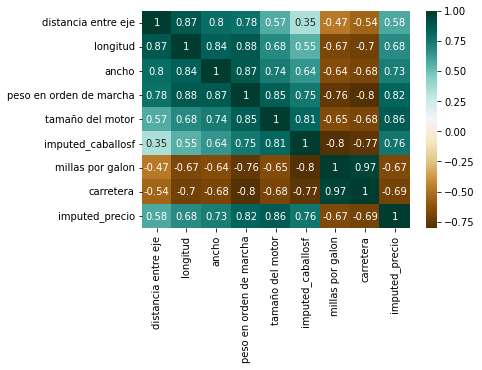

In [135]:
sns.heatmap(matriz_correlacion,cmap="BrBG",annot=True)

En el mapa de calor anterior, se observa que en general, casi todas las variables que se incluyeron en el análisis están correlacionadas ya sea de manera directamente proporcional o de forma inversa, lo cual, no es del todo bueno, dado que, para la estimación del precio del automóvil se busca que las variables están fuertemente correlacionadas con la variable de interés, pero no entre ellas, dado que, esto podría presentar problemas de multicolinealidad en la estimación posterior de los modelos.

In [138]:
COR = pd.DataFrame(c['imputed_precio'], ).sort_values('imputed_precio'); COR

,imputed_precio
carretera,-0.690526
millas por galon,-0.667449
imputed_rmp_pico,-0.100854
relacion de compresion,0.070990
imputed_carrera,0.082095
imputed_perdidas,0.133999
altura,0.134388
imputed_diametro,0.532300
distancia entre eje,0.583168
longitud,0.682986


In [141]:
CORsel = (COR >>
  mask(abs(X.imputed_precio) > 0.65))
CORsel

,imputed_precio
carretera,-0.690526
millas por galon,-0.667449
longitud,0.682986
ancho,0.728699
imputed_caballosf,0.757917
peso en orden de marcha,0.820825
tamaño del motor,0.861752
imputed_precio,1.000000


## **Escribir las seleccionadas**

In [142]:
selec_cuan = df_Aut.loc[:,['carretera','millas por galon','longitud','ancho','imputed_caballosf','peso en orden de marcha','tamaño del motor','imputed_precio']]

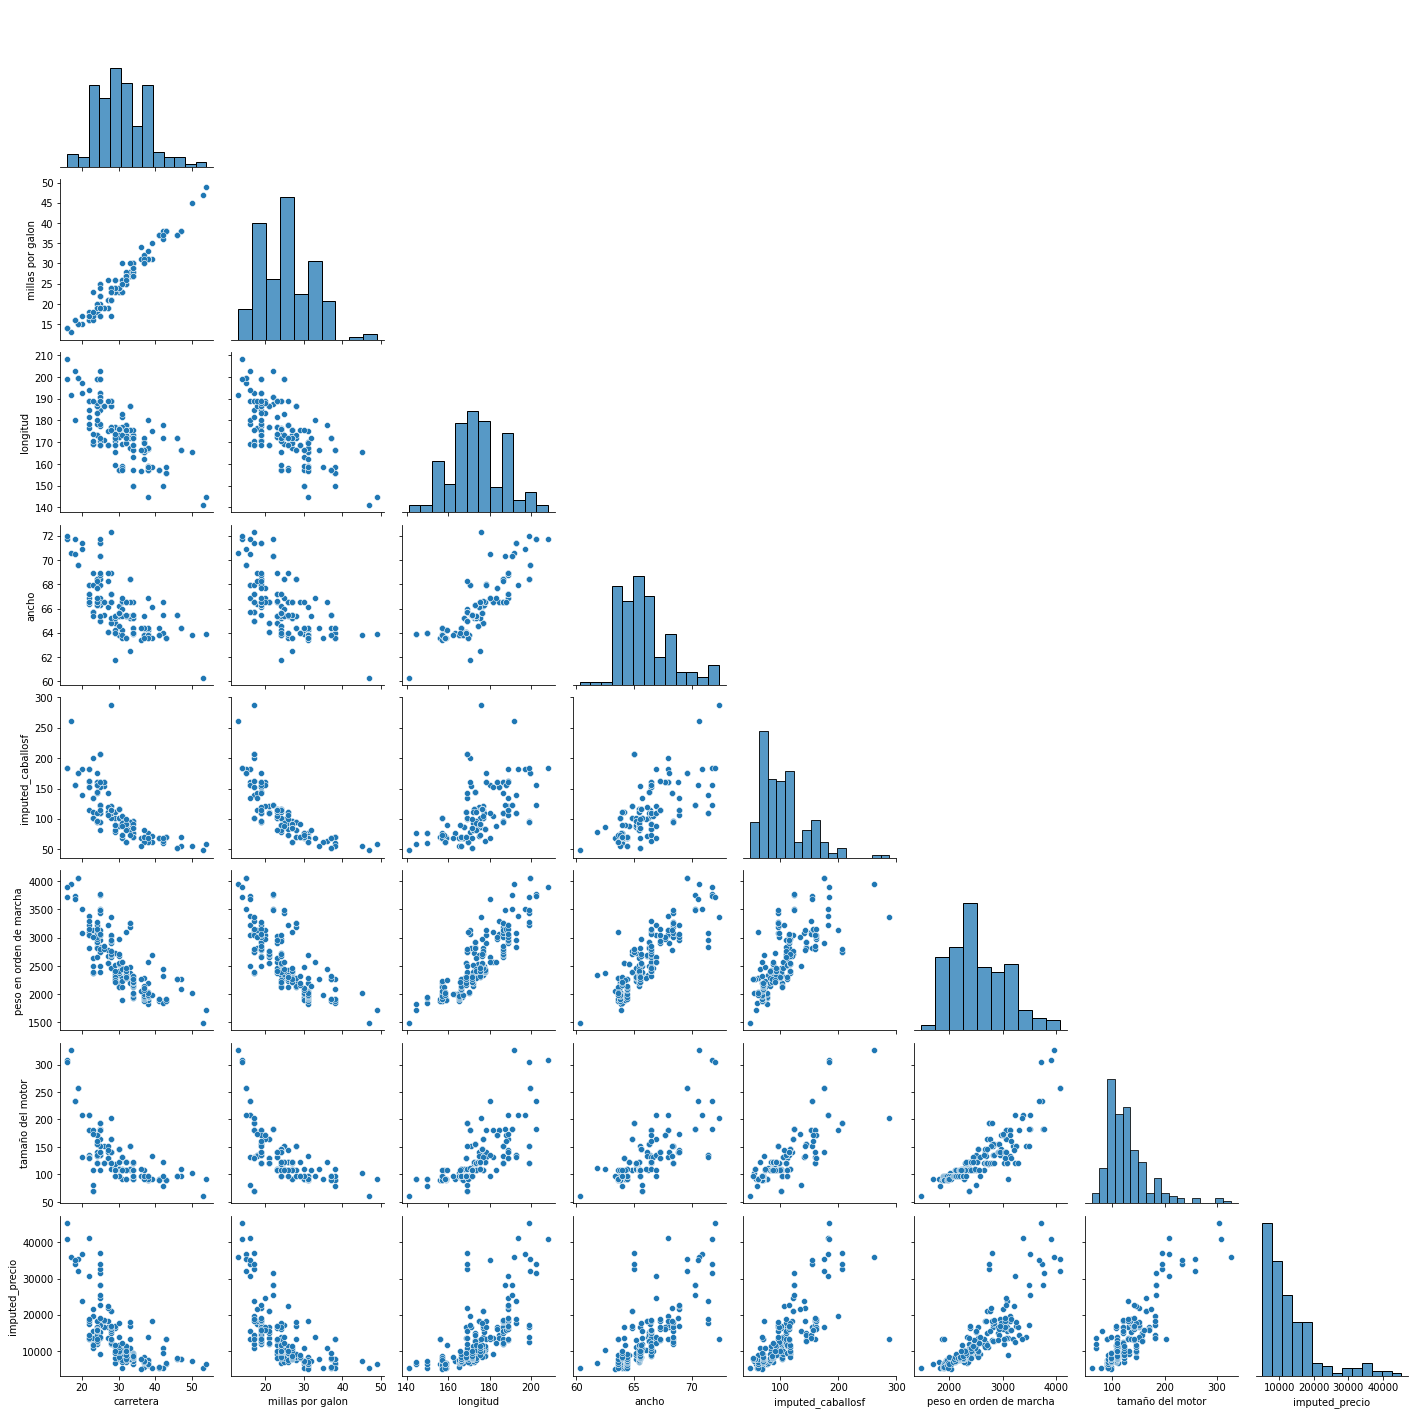

In [143]:
sns.pairplot(selec_cuan, diag_kind = 'hist', corner = True)

# **Selección variables independientes cuantitativas**

Para analizar las asociaciones de las variables cualitativas con el precio de los autos se procede a realizar el grafico de Box-Plot para observar como varia el comportamiento del precio de autos apartir de las diferentes modalidades de las variables, posteriormente se realiza una prueba $ANOVA$ para constrastar que, en caso de que hallan diferencias en media, sean significativas, por lo tanto, se desea juzgar el siguiente sistema de hipotesis:

$$
\left\{
\begin{array}{ll}
H_{0}: &  \mu_1 = \mu_2 =\ldots=\mu_a \\
H_{1}: & \mu_i \neq \mu_j \thinspace \thinspace \forall_{i \neq j}
\end{array}
\right.
$$


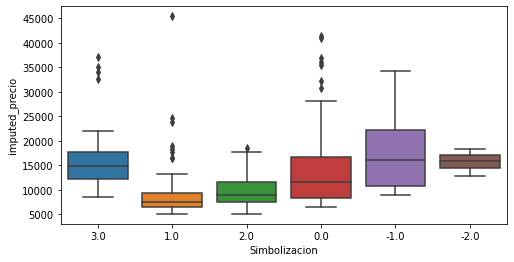

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Simbolizacion', y= 'imputed_precio', data = df_Aut, ax=ax)

In [150]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'Simbolizacion', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Simbolizacion,1.859493e+09,5,3.718986e+08,6.870593,0.000006,0.147215
1,Within,1.077168e+10,199,5.412904e+07,NaN,NaN,NaN


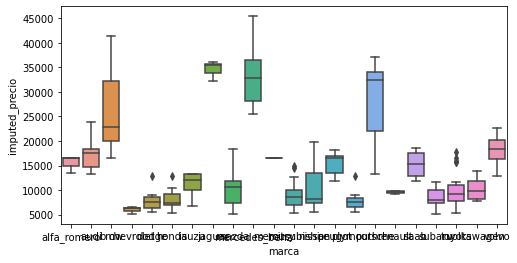

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'marca', y= 'imputed_precio', data = df_Aut, ax=ax)

In [152]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'marca', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,marca,9.750960e+09,21,4.643314e+08,29.502216,1.019818e-47,0.771976
1,Within,2.880213e+09,183,1.573887e+07,NaN,NaN,NaN


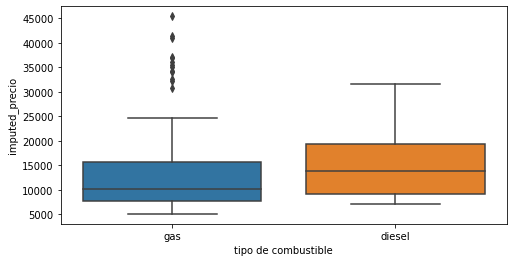

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'tipo de combustible', y= 'imputed_precio', data = df_Aut, ax=ax)

In [154]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'tipo de combustible', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,tipo de combustible,1.534125e+08,1,1.534125e+08,2.495859,0.115703,0.012146
1,Within,1.247776e+10,203,6.146680e+07,NaN,NaN,NaN


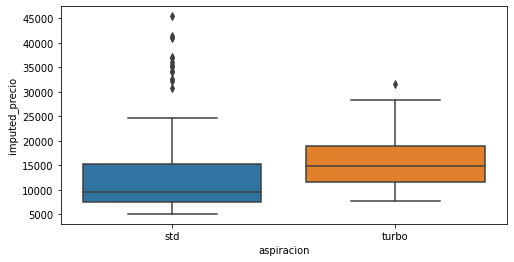

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'aspiracion', y= 'imputed_precio', data = df_Aut, ax=ax)

In [156]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'aspiracion', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,aspiracion,3.969954e+08,1,3.969954e+08,6.58729,0.010991,0.03143
1,Within,1.223418e+10,203,6.026688e+07,NaN,NaN,NaN


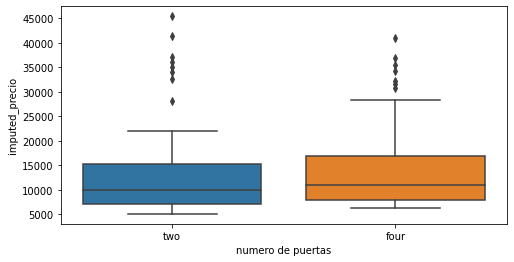

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'numero de puertas', y= 'imputed_precio', data = df_Aut, ax=ax)

In [158]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'numero de puertas', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,numero de puertas,2.222313e+07,1,2.222313e+07,0.357785,0.550406,0.001759
1,Within,1.260895e+10,203,6.211305e+07,NaN,NaN,NaN


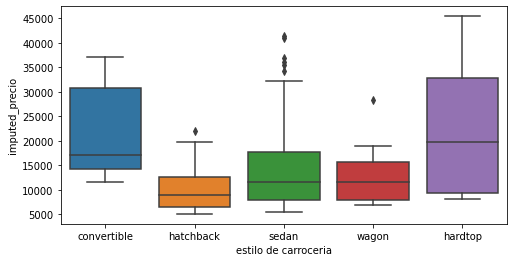

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'estilo de carroceria', y= 'imputed_precio', data = df_Aut, ax=ax)

In [160]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'estilo de carroceria', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,estilo de carroceria,1.960055e+09,4,4.900138e+08,9.183927,7.844576e-07,0.155176
1,Within,1.067112e+10,200,5.335559e+07,NaN,NaN,NaN


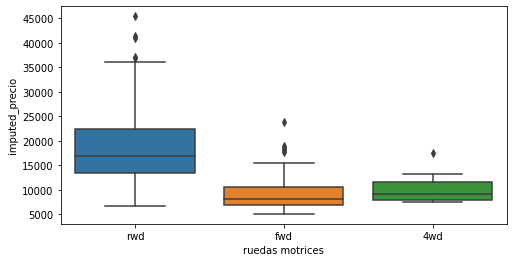

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'ruedas motrices', y= 'imputed_precio', data = df_Aut, ax=ax)

In [162]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'ruedas motrices', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,ruedas motrices,5.060130e+09,2,2.530065e+09,67.503667,3.539271e-23,0.400607
1,Within,7.571043e+09,202,3.748041e+07,NaN,NaN,NaN


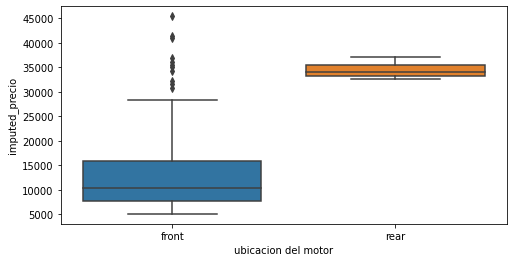

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'ubicacion del motor', y= 'imputed_precio', data = df_Aut, ax=ax)

In [165]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'ubicacion del motor', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,ubicacion del motor,1.383992e+09,1,1.383992e+09,24.979629,0.000001,0.10957
1,Within,1.124718e+10,203,5.540483e+07,NaN,NaN,NaN


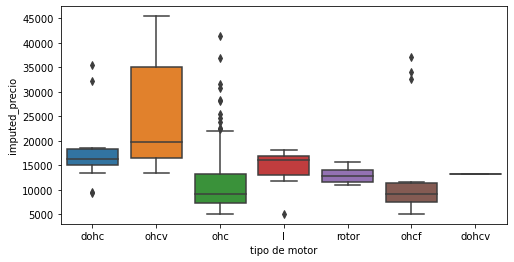

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'tipo de motor', y= 'imputed_precio', data = df_Aut, ax=ax)

In [167]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'tipo de motor', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,tipo de motor,2.538008e+09,6,4.230013e+08,8.298116,5.008078e-08,0.200932
1,Within,1.009316e+10,198,5.097558e+07,NaN,NaN,NaN


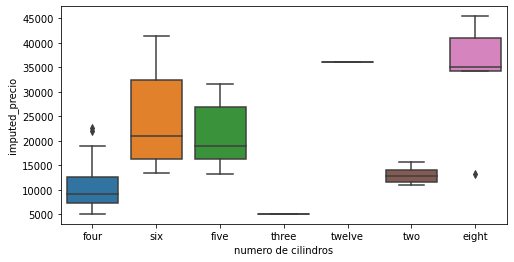

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'numero de cilindros', y= 'imputed_precio', data = df_Aut, ax=ax)

In [170]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'numero de cilindros', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,numero de cilindros,7.336567e+09,6,1.222761e+09,45.727054,7.149270e-35,0.58083
1,Within,5.294606e+09,198,2.674043e+07,NaN,NaN,NaN


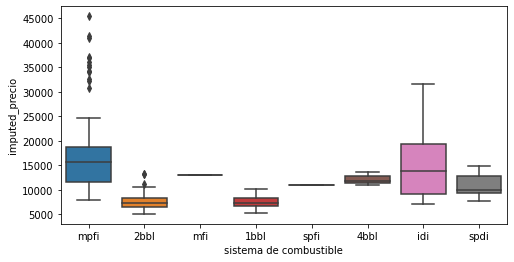

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'sistema de combustible', y= 'imputed_precio', data = df_Aut, ax=ax)

In [172]:
pg.anova(data = df_Aut, dv = 'imputed_precio', between = 'sistema de combustible', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,sistema de combustible,4.352758e+09,7,6.218225e+08,14.797402,1.865735e-15,0.344604
1,Within,8.278415e+09,197,4.202241e+07,NaN,NaN,NaN


In [174]:
selec_cuali = df_Aut.loc[:,['Simbolizacion', 'marca','estilo de carroceria','ruedas motrices','ubicacion del motor', 'tipo de motor', 'numero de cilindros','sistema de combustible']]

## **Escribir porque se seleccionaron**

# Modelo 1

In [175]:
selec_cuali.columns

Index(['Simbolizacion', 'marca', 'estilo de carroceria', 'ruedas motrices',
       'ubicacion del motor', 'tipo de motor', 'numero de cilindros',
       'sistema de combustible'],
      dtype='object')

In [192]:
print(pd.value_counts(df_Aut['Simbolizacion'])) 

0.0     67
1.0     54
2.0     32
3.0     27
-1.0    22
-2.0     3
Name: Simbolizacion, dtype: int64


In [193]:
Simbo_dum = pd.get_dummies(df_Aut['Simbolizacion'])
Simbo_dum = Simbo_dum.loc[:,['0.0']] # ref. 0

marca_dum = pd.get_dummies(df_Aut['marca'])
marca_dum = marca_dum.loc[:,['toyota']] # ref. toyota

carroceria_dum = pd.get_dummies(df_Aut['estilo de carroceria'])
carroceria_dum = carroceria_dum.loc[:,['sedan']] # ref. sedan

ruedas_dum = pd.get_dummies(df_Aut['ruedas motrices'])
ruedas_dum = ruedas_dum.loc[:,['fwd']] # ref. fwd

tipomotor_dum = pd.get_dummies(df_Aut['tipo de motor'])
tipomotor_dum = tipomotor_dum.loc[:,['ohc']] # ref. ohc

cilindros_dum = pd.get_dummies(df_Aut['numero de cilindros'])
cilindros_dum = cilindros_dum.loc[:,['four']] # ref. four

combustible_dum = pd.get_dummies(df_Aut['sistema de combustible'])
combustible_dum = combustible_dum.loc[:,['mpfi']] # ref. mpfi

In [209]:
# Crear variables para el modelo
y = df_Aut['imputed_precio'].values
X = np.c_[Simbo_dum,marca_dum,carroceria_dum,ruedas_dum,tipomotor_dum,cilindros_dum,combustible_dum, selec_cuan] ; X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.5480e+03, 1.3000e+02,
        1.3495e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.5480e+03, 1.3000e+02,
        1.6500e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.8230e+03, 1.5200e+02,
        1.6500e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 3.0120e+03, 1.7300e+02,
        2.1485e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 3.2170e+03, 1.4500e+02,
        2.2470e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 3.0620e+03, 1.4100e+02,
        2.2625e+04]])

In [202]:
from sklearn.linear_model import Ridge
from sklearn import metrics
from itertools import combinations

In [204]:
Parametros = [0, 0.5, 0.8, 10, 60 , 130]
Pares = list(combinations(Parametros, 2))

MAPE_mod1 = []
RMSE_mod1 = []

Tabla = pd.DataFrame(Pares, columns = ['tol','alpha'])
Tabla
grillita = (Tabla >> 
      mask(Tabla['tol'] != 10, Tabla['tol'] != 60, Tabla['alpha'] != 0.5,Tabla['alpha'] != 0.8))
grillita

,tol,alpha
2,0.0,10.0
3,0.0,60.0
4,0.0,130.0
6,0.5,10.0
7,0.5,60.0
8,0.5,130.0
9,0.8,10.0
10,0.8,60.0
11,0.8,130.0


In [210]:
for i in range(9):
  mod_reg1 = Ridge(alpha = grillita.iloc[i,1], tol = grillita.iloc[i,0])
  mod_reg1.fit(X,y)
  y_pred = mod_reg1.predict(X)
  MAPE_mod1.append(metrics.mean_absolute_error(y, y_pred))
  RMSE_mod1.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))